In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules, apriori

In [51]:
data = pd.read_csv("bread basket.csv", low_memory=False, sep=',')

In [10]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [6]:
data.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [52]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [13]:
data['Transaction'].nunique()

9465

In [77]:
unique_items = data["Item"].unique()
unique_items

array(['bread', 'scandinavian', 'hot chocolate', 'jam', 'cookies',
       'muffin', 'coffee', 'pastry', 'medialuna', 'tea', 'tartine',
       'basket', 'mineral water', 'farm house', 'fudge', 'juice',
       "ella's kitchen pouches", 'victorian sponge', 'frittata',
       'hearty & seasonal', 'soup', 'pick and mix bowls', 'smoothies',
       'cake', 'mighty protein', 'chicken sand', 'coke',
       'my-5 fruit shoot', 'focaccia', 'sandwich', 'alfajores', 'eggs',
       'brownie', 'dulce de leche', 'honey', 'the bart', 'granola',
       'fairy doors', 'empanadas', 'keeping it local', 'art tray',
       'bowl nic pitt', 'bread pudding', 'adjustment', 'truffles',
       'chimichurri oil', 'bacon', 'spread', 'kids biscuit', 'siblings',
       'caramel bites', 'jammie dodgers', 'tiffin', 'olum & polenta',
       'polenta', 'the nomad', 'hack the stack', 'bakewell',
       'lemon and coconut', 'toast', 'scone', 'crepes', 'vegan mincepie',
       'bare popcorn', 'muesli', 'crisps', 'pintxos', 

In [53]:
data['date'] = data['date_time'].dt.date

#Extracting time
data['time'] = data['date_time'].dt.time

# Extracting month and replacing it with text
data['month'] = data['date_time'].dt.month
data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'))

# Extracting hour
data['hour'] = data['date_time'].dt.hour
# Replacing hours with text
hour_in_num = (1,3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','3-4','5-6','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
data['hour'] = data['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
data['weekday'] = data['date_time'].dt.weekday
data['weekday'] = data['weekday'].replace((0,1,2,3,4,5,6), ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
data.drop('date_time', axis = 1, inplace = True)

In [16]:
data

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20503,9682,Tea,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20504,9683,Coffee,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday
20505,9683,Pastry,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday


In [54]:
data['Item'] = data['Item'].str.strip()
data['Item'] = data['Item'].str.lower()

In [18]:
data

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
...,...,...,...,...,...,...,...,...,...
20502,9682,coffee,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20503,9682,tea,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20504,9683,coffee,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday
20505,9683,pastry,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday


### **Data Visualization**

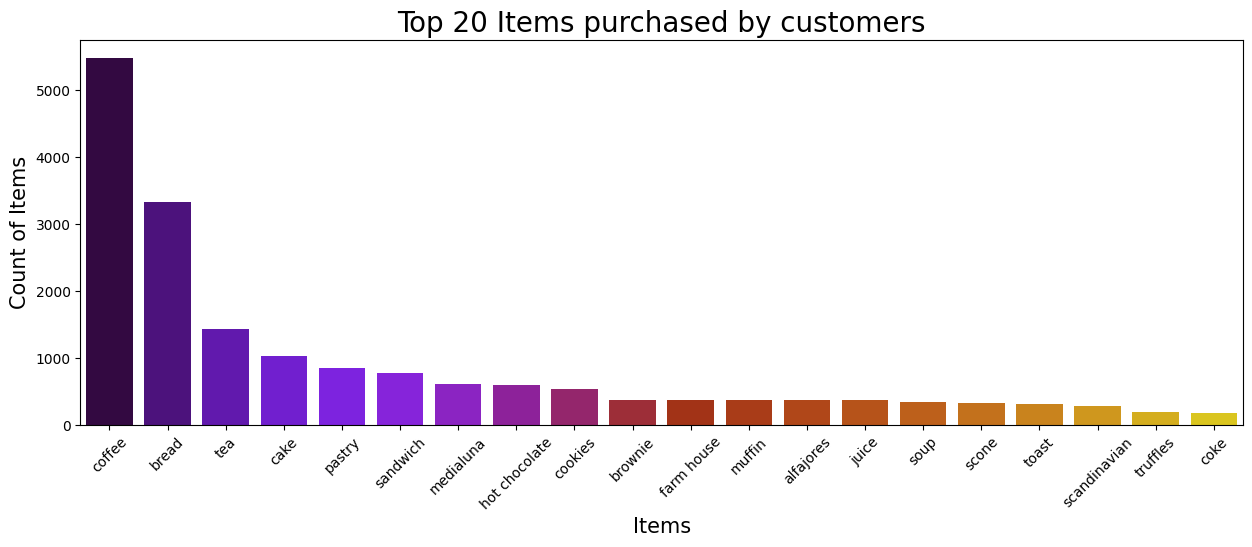

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x = data.Item.value_counts().head(20).index, y = data.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', size = 20)
plt.show()

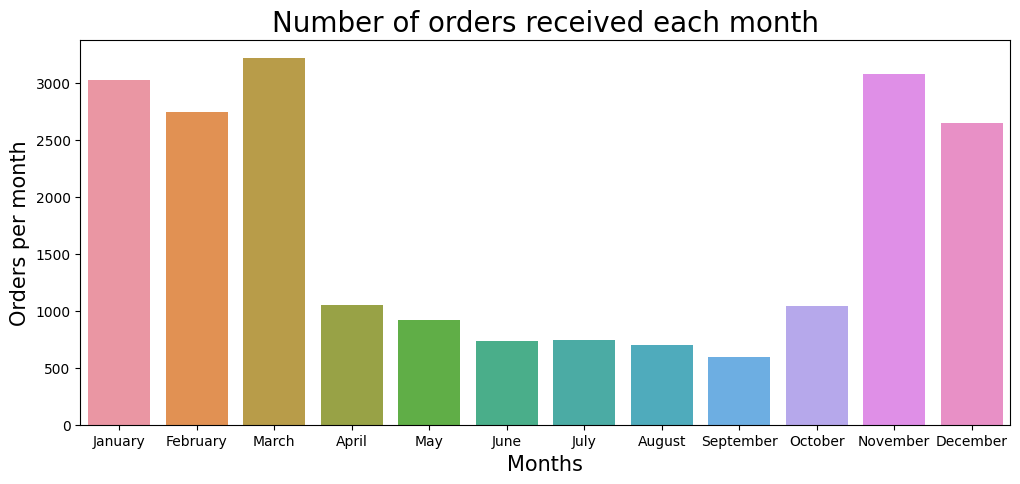

In [24]:
monthTran = data.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', size = 20)
plt.show()


plt.show()

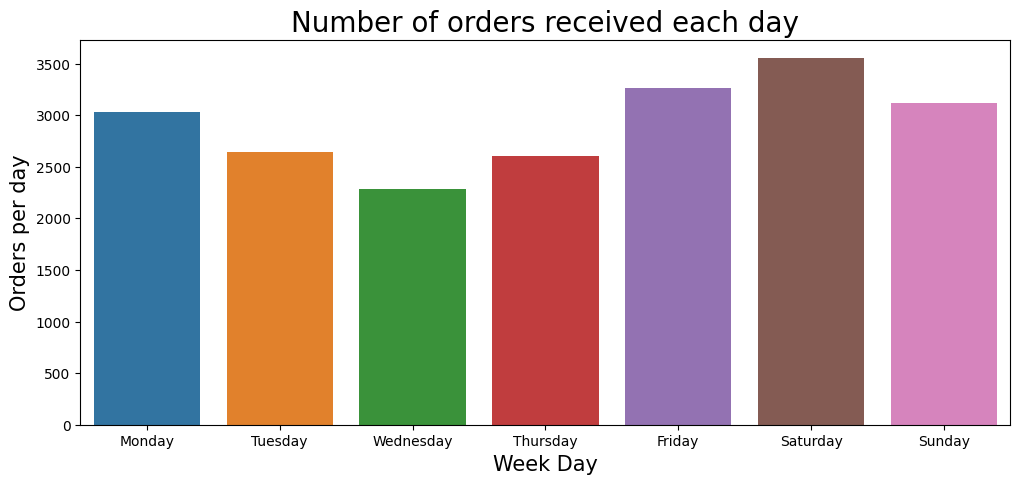

In [26]:
weekTran = data.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
weekTran.sort_values("weekorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTran, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', size = 20)
plt.show()


plt.show()

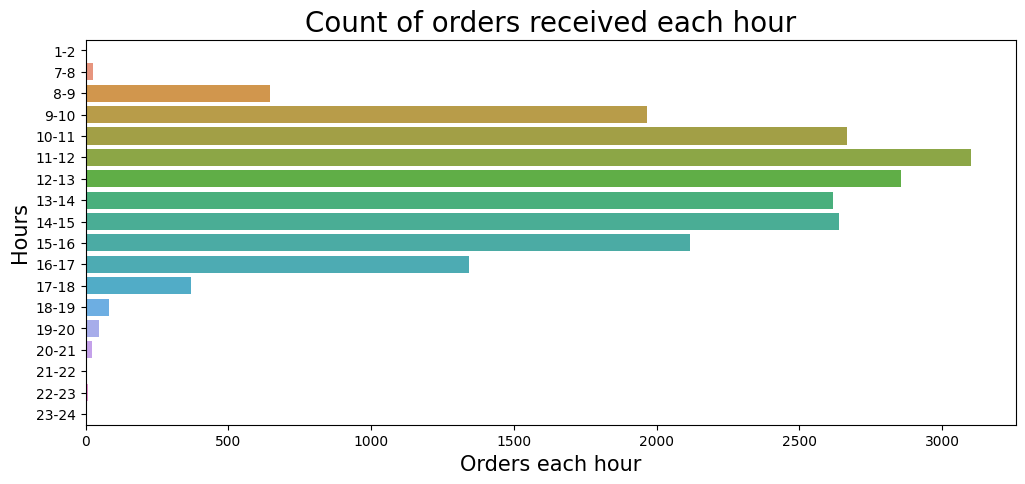

In [30]:
hourTran = data.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', size = 20)
plt.show()

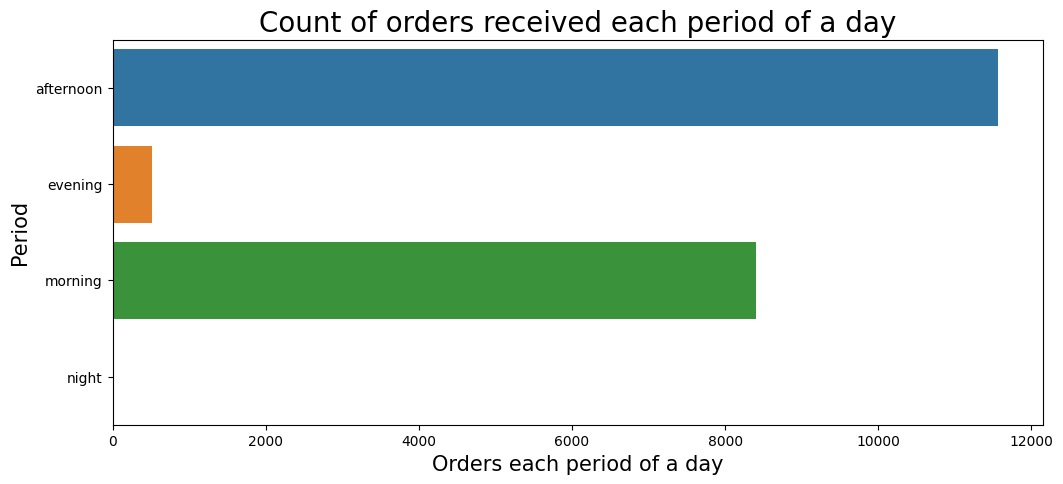

In [32]:
dayTran = data.groupby('period_day')['Transaction'].count().reset_index()
# dayTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
# dayTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', size = 20)
plt.show()

In [48]:
dates = data.groupby('date')['Transaction'].count().reset_index()
dates = dates[dates['Transaction']>=200].sort_values('date').reset_index(drop = True)

dates = pd.merge(dates, data[['date','weekday']], on = 'date', how = 'inner')
dates.drop_duplicates(inplace =True)
dates

,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday
1169,2017-03-25,246,Saturday
1415,2017-04-02,292,Sunday
1707,2017-04-03,257,Monday
1964,2017-08-04,205,Friday
2169,2017-11-03,203,Friday


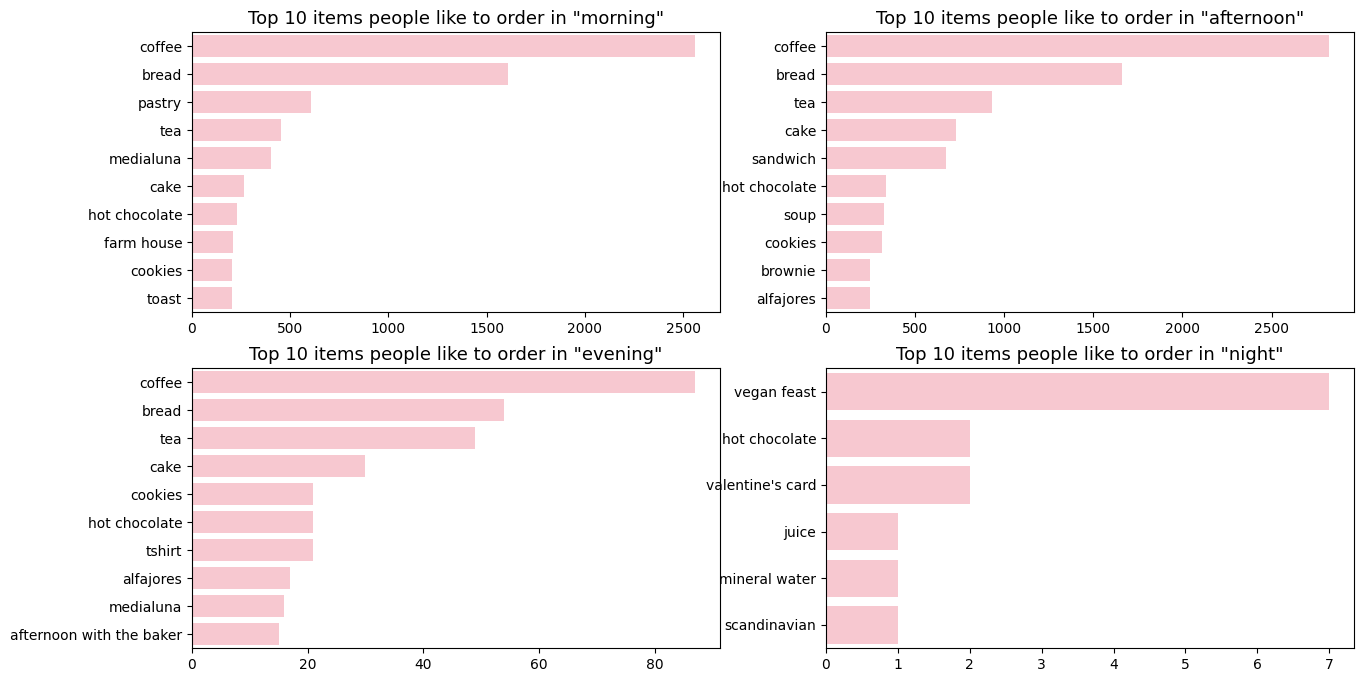

In [56]:
df = data.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = df[df.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

In [60]:
transactions_str = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [61]:
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
my_basket = my_basket.astype('int64')
my_basket

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

my_basket_sets = my_basket.applymap(encode)
my_basket_sets

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
print(f"Ukuran dataset : {my_basket_sets.shape}")
print(f"Jumlah dataset : {my_basket_sets.shape[0]}")
print(f"Jumlah item : {my_basket_sets.shape[1]}")

Ukuran dataset : (9465, 94)
Jumlah dataset : 9465
Jumlah item : 94


In [71]:
support = 0.01

frequent_items = apriori(my_basket_sets, min_support = support,use_colnames = True)
frequent_items.sort_values('support', ascending=False)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
...,...,...
11,0.010565,(hearty & seasonal)
20,0.010460,(salad)
30,0.010354,"(bread, alfajores)"
58,0.010037,"(cake, bread, coffee)"


In [73]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric = metric, min_threshold = min_threshold)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori

data = pd.read_csv("bread basket.csv", low_memory=False, sep=',')
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')

data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.weekday

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

data['month'] = data['month'].map(month_mapping)
data['day'] = data['day'].map(day_mapping)


st.title("Market Basket Analysis Menggunakan Algoritma Apriori")


def get_data(period_day='', weekday_weekend='', month='', day=''):
    data_process = data.copy()
    filtered = data_process.loc[
        (data_process["period_day"].str.contains(period_day)) &
        (data_process["weekday_weekend"].str.contains(weekday_weekend)) &
        (data_process["month"].str.contains(month.title())) &
        (data_process["day"].str.contains(day.title()))
    ]
    return filtered if filtered.shape[0] else "No Result!"


def user_input_features():
    item = st.selectbox("Item", ['bread', 'scandinavian', 'hot chocolate', 'jam', 'cookies',
                                 'muffin', 'coffee', 'pastry', 'medialuna', 'tea', 'tartine',
                                 'basket', 'mineral water', 'farm house', 'fudge', 'juice',
                                 "ella's kitchen pouches", 'victorian sponge', 'frittata',
                                 'hearty & seasonal', 'soup', 'pick and mix bowls', 'smoothies',
                                 'cake', 'mighty protein', 'chicken sand', 'coke',
                                 'my-5 fruit shoot', 'focaccia', 'sandwich', 'alfajores', 'eggs',
                                 'brownie', 'dulce de leche', 'honey', 'the bart', 'granola',
                                 'fairy doors', 'empanadas', 'keeping it local', 'art tray',
                                 'bowl nic pitt', 'bread pudding', 'adjustment', 'truffles',
                                 'chimichurri oil', 'bacon', 'spread', 'kids biscuit', 'siblings',
                                 'caramel bites', 'jammie dodgers', 'tiffin', 'olum & polenta',
                                 'polenta', 'the nomad', 'hack the stack', 'bakewell',
                                 'lemon and coconut', 'toast', 'scone', 'crepes', 'vegan mincepie',
                                 'bare popcorn', 'muesli', 'crisps', 'pintxos', 'gingerbread syrup',
                                 'panatone', 'brioche and salami', 'afternoon with the baker',
                                 'salad', 'chicken stew', 'spanish brunch',
                                 'raspberry shortbread sandwich', 'extra salami or feta',
                                 'duck egg', 'baguette', "valentine's card", 'tshirt',
                                 'vegan feast', 'postcard', 'nomad bag', 'chocolates',
                                 'coffee granules', 'drinking chocolate spoons', 'christmas common',
                                 'argentina night', 'half slice monster', 'gift voucher',
                                 'cherry me dried fruit', 'mortimer', 'raw bars', 'tacos/fajita'])
    period_day = st.selectbox(
        "Period Day", ['Morning', 'Afternoon', 'Evening', 'Night'])
    weekday_weekend = st.selectbox("Weekday / Weekend", ['Weekday', 'Weekend'])
    month = st.select_slider("Month", [
                             'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    day = st.select_slider(
        "Day", ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], value='Sat')

    return period_day, weekday_weekend, month, day, item


period_day, weekday_weekend, month, day, item = user_input_features()
data_process = get_data(
    period_day.lower(), weekday_weekend.lower(), month, day)


def encode(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1


if type(data_process) != type("No Result!"):
    item_count = data_process.groupby(["Transaction", "Item"])[
        "Item"].count().reset_index(name="Count")
    item_count_pivot = item_count.pivot_table(
        index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
    item_count_pivot = item_count_pivot.applymap(encode)

    support = 0.01
    frequent_items = apriori(
        item_count_pivot, min_support=support, use_colnames=True)

    metric = 'lift'
    min_threshold = 1

    rules = association_rules(
        frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
    rules.sort_values('confidence', ascending=False, inplace=True)


def parse_list(x):
    x = list(x)
    if len(x) == 1:
        return x[0]
    elif len(x) > 1:
        return ", ".join(x)


def return_item_df(item_antecedents):
    data_process = rules[["antecedents", "consequents"]].copy()

    data_process["antecedents"] = data_process["antecedents"].apply(parse_list)
    data_process["consequents"] = data_process["consequents"].apply(parse_list)

    # return list(data_process.loc[data_process['antecedents'] == item_antecedents].iloc[0, :])
    matching_rows = data_process.loc[data_process['antecedents']
                                     == item_antecedents]
    if not matching_rows.empty:
        return list(matching_rows.iloc[0, :])
    else:
        return "No matching data found"


if type(data_process) != type("No Result!"):
    st.markdown("Hasil Rekomendasi : ")
    st.success(
        f"Jika Konsumen Membeli **{ item }**, Maka Membeli **{ return_item_df(item)[1] }** Secara Bersamaan")
